In [4]:
# Name : Thirunavukkarasu meenakshisundaram
# Reg no: 212224220117
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
dataset1 = pd.read_csv('exp1_dataset.csv')
X = dataset1[['Input (x)']].values
y = dataset1[['Output (y)']].values
dataset1.head()

,Input (x),Output (y),Unnamed: 2,Formula:,y = mx + c
0,1,11,NaN,m (slope):,10
1,2,21,NaN,c (intercept):,1
2,3,31,NaN,Example:,y = 10x + 1
3,4,41,NaN,Total rows:,100
4,5,51,NaN,NaN,NaN


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [7]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [9]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 8)
        self.fc2 = nn.Linear(8, 10)
        self.fc3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
        self.history = {'loss': []}

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # No activation here since it's a regression task
        return x

In [10]:
ai_brain = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(ai_brain.parameters(), lr=0.001)

In [11]:
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = criterion(ai_brain(X_train), y_train)
        loss.backward()
        optimizer.step()

        ai_brain.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')


In [12]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)


Epoch [0/2000], Loss: 791767.437500
Epoch [200/2000], Loss: 783731.437500
Epoch [400/2000], Loss: 768919.250000
Epoch [600/2000], Loss: 746002.000000
Epoch [800/2000], Loss: 714245.937500
Epoch [1000/2000], Loss: 673367.937500
Epoch [1200/2000], Loss: 623635.687500
Epoch [1400/2000], Loss: 565973.625000
Epoch [1600/2000], Loss: 502066.375000
Epoch [1800/2000], Loss: 434445.718750


In [13]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')


Test Loss: 600801.625000


In [14]:
loss_df = pd.DataFrame(ai_brain.history)

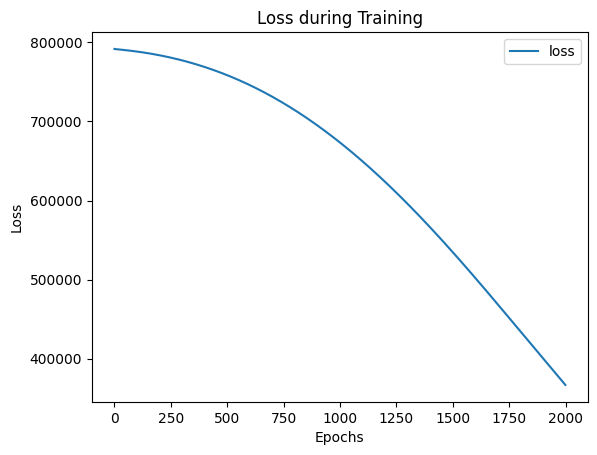

In [15]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [16]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 279.0621643066406
